Import necessary libraries

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Read the heart disease dataset

In [18]:
# Read the heart disease dataset
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Mini EDA

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [20]:
df.describe(include='all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


Remove outliers using Z score

In [21]:
# Remove outliers using Z score
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
df = df[(z_scores < 3).all(axis=1)]

Encoding categorical features

In [22]:
# Convert text columns to numbers using label encoding and one hot encoding
le = LabelEncoder()
for column in ['Sex', 'ExerciseAngina']:
    df[column] = le.fit_transform(df[column])
cols = ['ChestPainType', 'RestingECG', 'ST_Slope']
df = pd.get_dummies(df, columns = cols, drop_first=True)
df.shape

(899, 16)

Scaling

In [23]:
# Apply scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('HeartDisease', axis=1))

Training and test sets

In [24]:
# Split the dataset into features and target variable then into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['HeartDisease'], test_size=0.2, random_state=42)

SVM Model

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, k

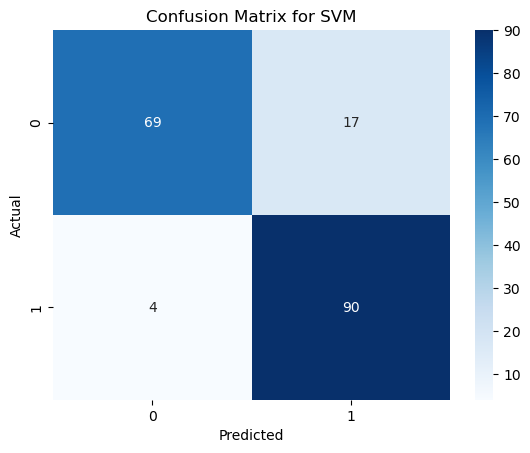

In [25]:
# Building a SVM model
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best parameters found: ", grid.best_params_)

# Train the SVM model with the best parameters
best_params = grid.best_params_
svm_model = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluate the SVM model
print("SVM Model Accuracy: ", accuracy_score(y_test, y_pred_svm))

# Confusion matrix and classification report for SVM
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Plot confusion matrix for SVM
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression Model

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END .................................C=0.1, solver=saga; total time=   0.0s
[CV] END .................................C=0.1, solver=saga; total time=   0.0s
[CV] END .................................C=0.1, solver=saga; total time=   0.0s
[CV] END .................................C=0.1, solver=saga; total time=   0.0s
[CV] END .................................C=0.1, solver=saga; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solve

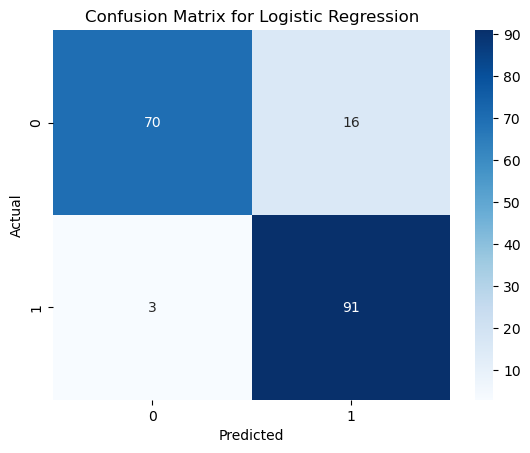

In [26]:
# Building a Logistic Regression model
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
grid = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best parameters found: ", grid.best_params_)

# Train the Logistic Regression model with the best parameters
best_params = grid.best_params_
logReg_model = LogisticRegression(C=best_params['C'], solver=best_params['solver'])
logReg_model.fit(X_train, y_train)

# Make predictions
y_pred_logReg = logReg_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Model Accuracy: ", accuracy_score(y_test, y_pred_logReg))

# Confusion matrix and classification report for Logistic Regression model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logReg))
print("Classification Report:\n", classification_report(y_test, y_pred_logReg))

# Plot confusion matrix for SVM
sns.heatmap(confusion_matrix(y_test, y_pred_logReg), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Classifier Model

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_de

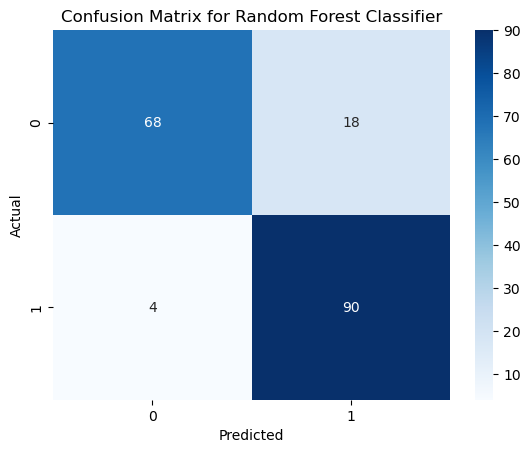

In [27]:
# Building a Random Forest Classifier model
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, refit=True, verbose=2)
grid_rf.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best parameters found for Random Forest: ", grid_rf.best_params_)

# Train the Random Forest Classifier model with the best parameters
best_params_rf = grid_rf.best_params_
rf_model = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'],
                                    max_depth=best_params_rf['max_depth'],
                                    min_samples_split=best_params_rf['min_samples_split'],
                                    min_samples_leaf=best_params_rf['min_samples_leaf'])
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest Classifier model
print("Random Forest Classifier Model Accuracy: ", accuracy_score(y_test, y_pred_rf))

# Confusion matrix and classification report for Random Forest
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot confusion matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

PCA

In [ ]:
# Using PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Check the shape of PCA transformed data
print("New shape:", X_train.shape)

# Train the SVM model with PCA features
svm_model_pca = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])
svm_model_pca.fit(X_train_pca, y_train)

# Make predictions with PCA features
y_pred_svm_pca = svm_model_pca.predict(X_test_pca)

# Evaluate the SVM model with PCA features
print("SVM Model with PCA Accuracy: ", accuracy_score(y_test, y_pred_svm_pca))

# Confusion matrix and classification report for SVM with PCA
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm_pca))
print("Classification Report:\n", classification_report(y_test, y_pred_svm_pca))

# Plot confusion matrix for SVM with PCA
sns.heatmap(confusion_matrix(y_test, y_pred_svm_pca), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM with PCA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Original shape: (719, 15)


KeyError: 'gamma'